B104R Artificial Intelligence & Machine
Learning- Khadija Ayadi GH25231

Github-Link: https://github.com/khadijayadi/AI-and-Machine-Learning-project---Used-french-cars-price-prediction


#**I.Problem statement : Predecting Used car prices in France**

## Business Context :

The company is a reseller of second-hand cars in France.  
One of the most critical challenges is setting the right price for each car.  

- **If the price is too low** >> the company loses potential revenue.  
- **If the price is too high** >> the car may remain unsold, leading to higher holding costs.  

Having accurate price prediction avoids situations such as:

- Losses stemming from underpricing.
- Sales opportunities by being competitively priced.
- Inventory turnover improvements.
- Trust with customers by having clear/researched pricing.

## Dataset : French Second-Hand Car (Kaggle)

The French Second-Hand Car dataset was gathered by SpiceMix and published on Kaggle. It contains advertisements for used cars in France, from both re-sellers and individuals. It has features applicable to all vehicles, along with a handful of electric car specific features. The dataset is a static snapshot and may not represent the current market.

Data URL :https://www.kaggle.com/datasets/spicemix/french-second-hand-car/data

## Machine Learning Task:

This project's aim is to create a machine learning model that will compute the selling price of a used car in the  French market on the basis of its features.

The target variable which is the price, is continuous which allows us to naturally frame this as a **regression problem**. The input features are brand, model, year and month of registration, mileage, power, fuel type, gearbox, and damage status; the output is the predicted car price in euros.

##**Used Librairies**

In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler


#**II. Data Exploration :**

In [7]:
# Load dataset
df = pd.read_csv("/content/dataset.csv")

print("Shape of dataset:", df.shape)
print("\nColumn types:")
print(df.dtypes)

df.head()

Shape of dataset: (2441, 40)

Column types:
publishedsince               object
carmodel                     object
price                        object
année                       float64
miseencirculation            object
contrôletechnique            object
kilométragecompteur          object
énergie                      object
boîtedevitesse               object
couleurextérieure            object
nombredeportes              float64
nombredeplaces              float64
garantie                     object
premièremain(déclaratif)     object
nombredepropriétaires       float64
puissancefiscale             object
puissancedin                 object
crit'air                    float64
émissionsdeco2               object
consommationmixte            object
normeeuro                    object
options                      object
departement                   int64
id                            int64
waranty                      object
vendeur                      object
vérifié&garanti     

,publishedsince,carmodel,price,année,miseencirculation,contrôletechnique,kilométragecompteur,énergie,boîtedevitesse,couleurextérieure,...,conso.batterie,couleurintérieure,puissancemoteur,primeàlaconversion,garantieconstructeur,provenance,prixinclutlabatterie,voltagebatterie,intensitébatterie,prixinclutlabatterie.1
0,2 jours,\n RENAULT TWINGO 3\n,\n 11 080 €\n,2020.0,17/07/2020,non requis,27 297 Km,Essence,mécanique,gris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5 jours,\n BMW SERIE 4 F36 GRAN COUPE\n,\n 50 690 €\n,2019.0,27/04/2019,non requis,59 778 Km,Diesel,automatique,Saphirschwarz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19 jours,\n BMW SERIE 2 F45 ACTIVE TOURER\n,\n 19 740 €\n,2017.0,14/05/2017,requis,128 835 Km,Hybride essence électrique,automatique,gris metal,...,11 kWh/100km,cuir noir,165 kW,,NaN,NaN,NaN,NaN,NaN,NaN
3,8 jours,\n RENAULT TRAFIC 2 MINIBUS\n,\n 13 890 €\n,2007.0,11/05/2007,requis,225 334 Km,Diesel,mécanique,GRIS F,...,NaN,GRIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60 jours,\n CITROEN C3 (3E GENERATION)\n,\n 16 780 €\n,2020.0,20/01/2021,non requis,14 218 Km,Essence,mécanique,gris foncé,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Summary statistics of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
année,2440.0,2.018381e+03,4.910162e+00,1.956000e+03,2.018000e+03,2.019000e+03,2.021000e+03,2.022000e+03
nombredeportes,2436.0,4.561576e+00,9.404799e-01,2.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
nombredeplaces,2362.0,4.751905e+00,8.771697e-01,2.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,9.000000e+00
nombredepropriétaires,970.0,1.503093e+00,9.020620e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00
crit'air,2363.0,1.513331e+00,5.740397e-01,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
departement,2441.0,5.090619e+01,2.564427e+01,1.000000e+00,3.000000e+01,5.100000e+01,7.100000e+01,9.500000e+01
id,2441.0,7.218321e+10,6.773149e+09,6.910412e+10,6.910948e+10,6.910969e+10,6.910979e+10,8.710224e+10


## Descriptive Statistics :

This overall analysis supports that most of the variables are valid and reasonable in value, though some extreme department codes and very old years may merit further inspection before we process the data further. We are emphasizing descriptive statistics in this step, because it gives us a visual representation of our data distribution, and helps to highlight any possible anomalies or guide any preprocessing decision-making.

In [9]:
# Check misssing values in the dataset

missing = df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing

,0
prixinclutlabatterie.1,2438
intensitébatterie,2382
conso.batterie,2375
autonomiebatterie,2340
voltagebatterie,2330
provenance,2323
prixinclutlabatterie,2300
capacitébatterie,2284
rechargeable,2256
primeàlaconversion,2031


## Outliers Detection and target Distribution :




**Price Distribution**

In [10]:
# Clean and convert 'price' to numeric
df['price'] = (
    df['price']
    .astype(str)
    .str.replace(r'[^0-9]', '', regex=True)
)

df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows where price is missing or equal to 0 (unrealistic prices)
df = df[df['price'].notnull()]
df = df[df['price'] > 0]

The dataset had issues in the `price` column due to formatting issues, which caused errors when trying to run some visualisations.

I cleaned that column by removing all but the digits and then converted to numeric. The invalid entries were replaced with NaNs and dropped.  I also dropped those prices that were equal to 0, as those would be difficult to rationalize in car sales.  

The price distribution is now much easier to interpret. I also used the log transformation ( see the plots below ), which showed a more normal shape that will benefit our models down the line.  

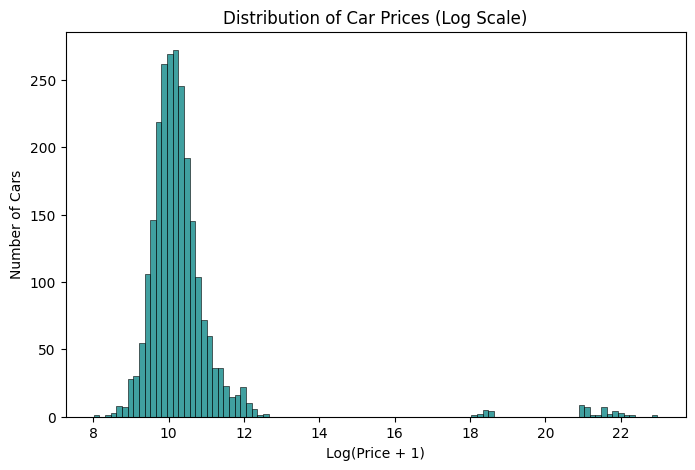

In [11]:
# Car Prices' distribution

plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df['price']), bins=100, kde=False, color="teal")
plt.title("Distribution of Car Prices (Log Scale)")
plt.xlabel("Log(Price + 1)")
plt.ylabel("Number of Cars")
plt.show()



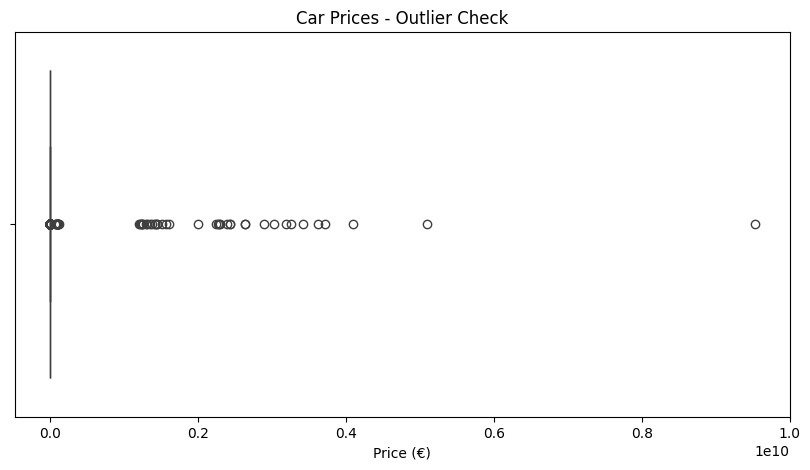

In [12]:
# Car prices' outliers

plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.title("Car Prices - Outlier Check")
plt.xlabel("Price (€)")
plt.show()


- The distribution of car prices is very skewed with most
cars being at a lower price and some extremely high-priced cars extending the scale of pricing.

- The use of a boxplot also confirms substantial outlying values which could either be outliers related to rare expensive cars or erroneous observations in the data.

- This preliminary assessment is useful in that it indicates that prices cannot be treated as normally distributed.

> Also, there will probably be a need for some preprocessing steps such as outlier removal and  log-transforming the data before a reasonable and interpretable model is built.  

**Mileage Distribution**

In [13]:
# Convert mileage to numeric
df['kilométragecompteur'] = (
    df['kilométragecompteur']
    .astype(str)
    .str.replace(r'[^0-9]', '', regex=True)
)

df['kilométragecompteur'] = pd.to_numeric(df['kilométragecompteur'], errors='coerce')


df = df[df['kilométragecompteur'].notnull()]
df = df[df['kilométragecompteur'] > 0]
df['kilométragecompteur'] = df['kilométragecompteur'] * 1000

print("Mileage range:", df['kilométragecompteur'].min(), "-", df['kilométragecompteur'].max())


Mileage range: 1000.0 - 399110000.0


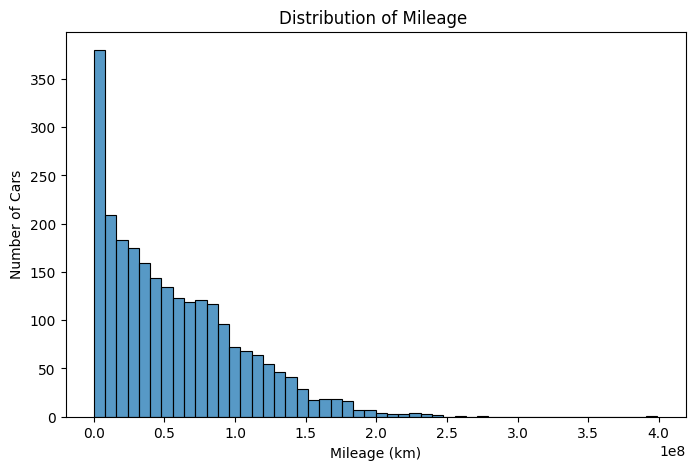

In [14]:
# Mileage distribution
plt.figure(figsize=(8,5))
sns.histplot(df['kilométragecompteur'], bins=50, kde=False)
plt.title("Distribution of Mileage ")
plt.xlabel("Mileage (km)")
plt.ylabel("Number of Cars")
plt.show()


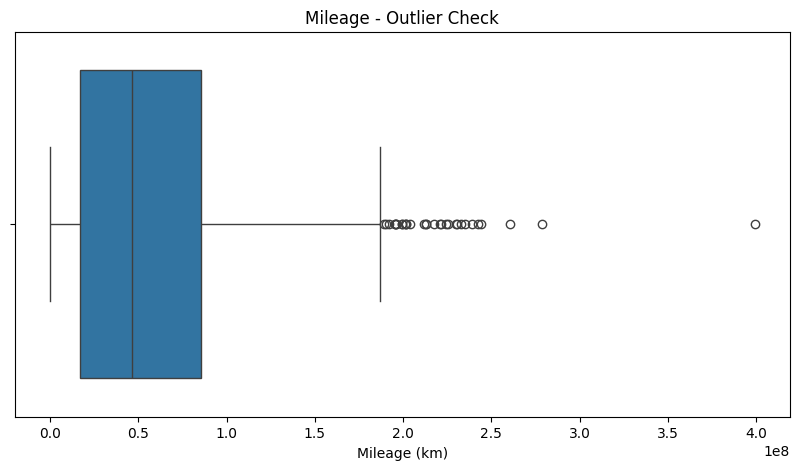

In [15]:
# Boxplot for outliers

plt.figure(figsize=(10,5))
sns.boxplot(x=df['kilométragecompteur'])
plt.title("Mileage - Outlier Check")
plt.xlabel("Mileage (km)")
plt.show()

Most cars cluster in a reasonable range, close to approximately 50,000 and 250,000 km, with some extreme outliers above 1,000,000.  
Again, the boxplot provides an excellent visual representation of the outliers, and this is useful as it will need to be addressed during preprocessing.

> This is important because mileage is an important predictor of price; the higher a car's mileage, the lower its expected price.  

**Car Age**

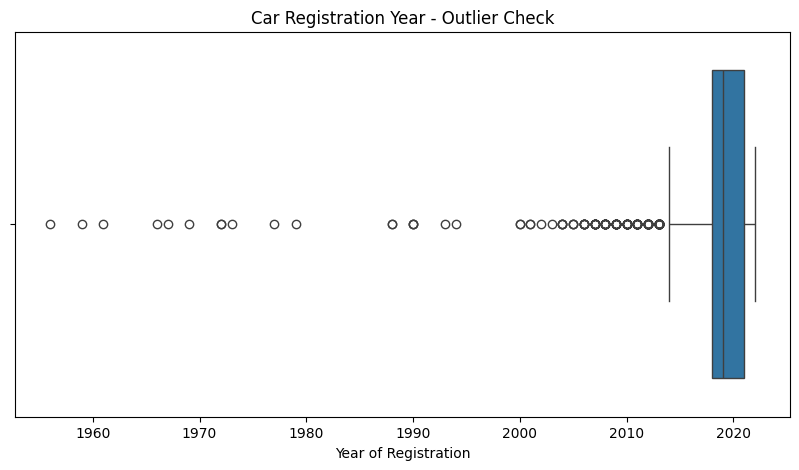

In [16]:
# Boxplot for year
plt.figure(figsize=(10,5))
sns.boxplot(x=df['année'])
plt.title("Car Registration Year - Outlier Check")
plt.xlabel("Year of Registration")
plt.show()

Most vehicles in the dataset were registered after 2010, with a clear spike in the years ranging from 2015 to 2022.

This is anticipated due to the nature of second-hand listings, which are typically more present-day vehicles.  
The boxplot indicates a few outliers,vehicles with a registration year prior to 1980, which could be collector or rare vintage cars.  
Year of registration (or car age) is an important feature in price prediction since newer cars generally sell for a higher price than older vehicles.

**Categorical EDA**

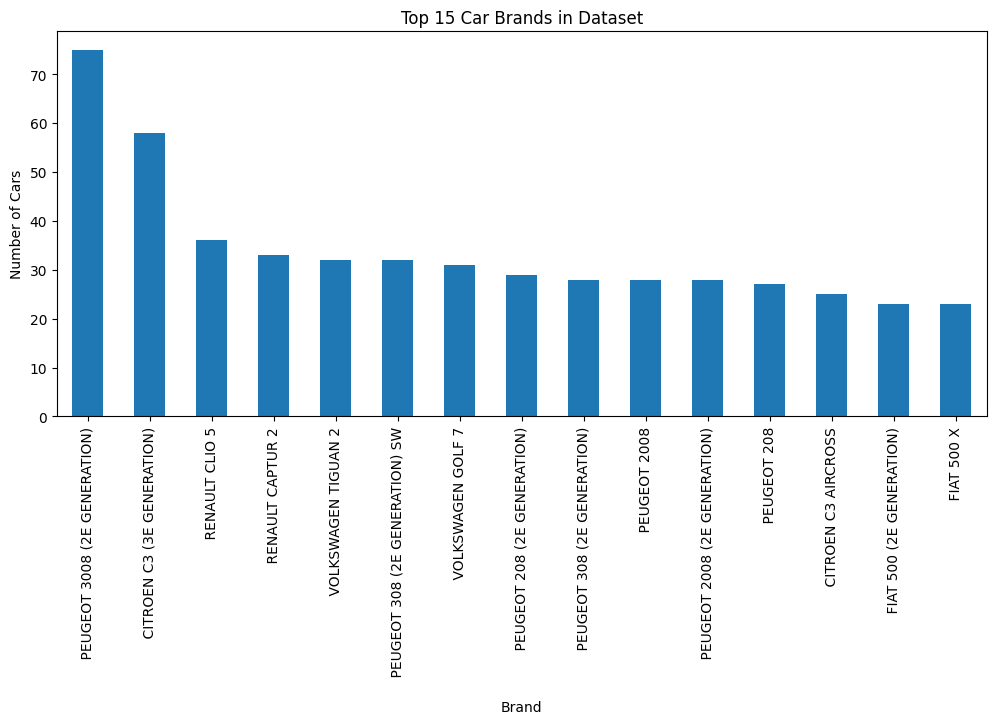

In [17]:
# Brand distribution
plt.figure(figsize=(12,5))
df['carmodel'].value_counts().head(15).plot(kind='bar')
plt.title("Top 15 Car Brands in Dataset")
plt.xlabel("Brand")
plt.ylabel("Number of Cars")
plt.show()

French brands, including Peugeot, Renault, and Citroën, are dominant in the market and will influence future pricing .  

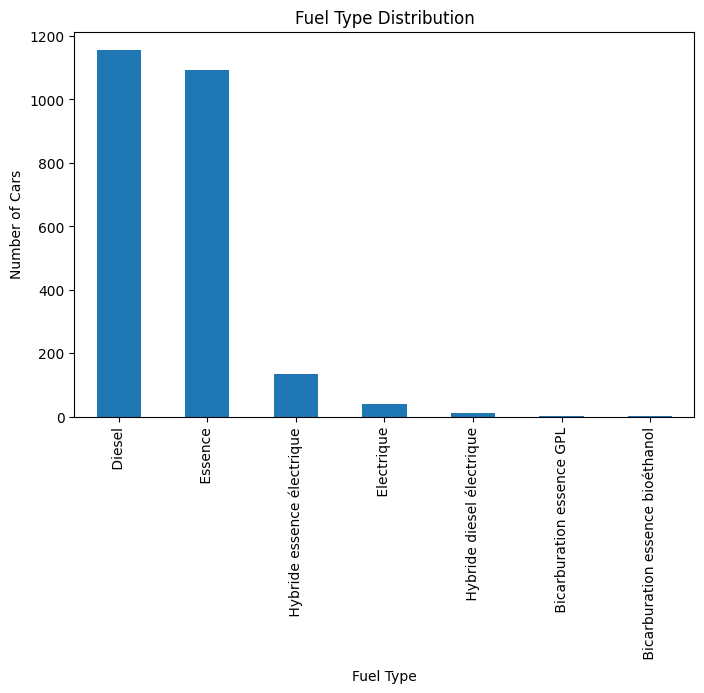

In [18]:
# Fuel type distribution
plt.figure(figsize=(8,5))
df['énergie'].value_counts().plot(kind='bar')
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Number of Cars")
plt.show()

Diesel and petrol are the predominate fuel types, while electric and hybrid accounted for only a handful of sales and indicate a significant class imbalance that must be taken into account in our modeling.  

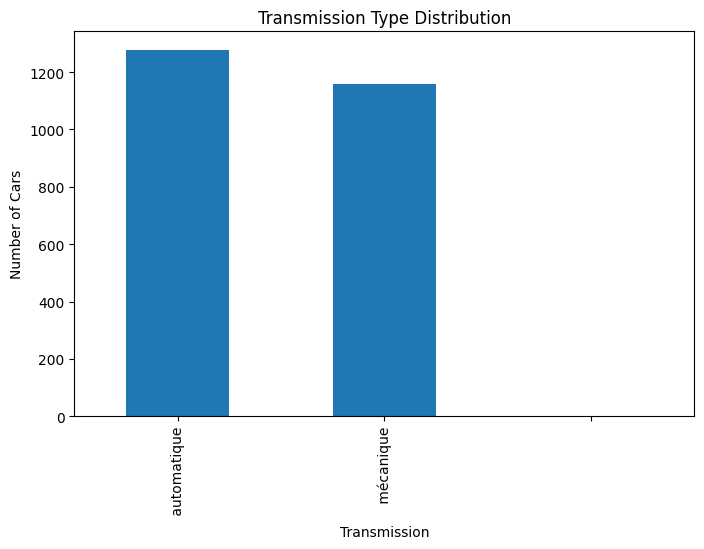

In [19]:
# Transmission distribution
plt.figure(figsize=(8,5))
df['boîtedevitesse'].value_counts().plot(kind='bar')
plt.title("Transmission Type Distribution")
plt.xlabel("Transmission")
plt.ylabel("Number of Cars")
plt.show()

 Both manual and automatic vehicles exist in the sample, but vehicles with manual transmission occurred slightly more often for the French sample, this is consistent with driving habits in Europe and this may lead to differences in pricing structure.

#**III. Data Preprocessing & Feature engineering :**






## Transform key columns to numeric values

In [20]:
# we will work on a copy so we can always go back to df

df_proc = df.copy()

# Ensure that the target ''price'' is a numeric value
# I will keep only digits, converts to float
# we don't drop any rows here yet
if 'price' in df_proc.columns:
    df_proc['price'] = (
        df_proc['price']
        .astype(str)
        .str.replace(r'[^0-9]', '', regex=True)
        .replace('', np.nan)
        .astype(float)
    )


# Ensure mileage is numeric kilometers
# I noticed that Many mileage are stored with spaces like that "225 000 Km"
# so I will keep digits only, convert to float, then auto-fix scale if it looks like "thousands" because it does not make sens for used cars .

if 'kilométragecompteur' in df_proc.columns:
    df_proc['kilométragecompteur'] = (
        df_proc['kilométragecompteur']
        .astype(str)
        .str.replace(r'[^0-9]', '', regex=True)
        .replace('', np.nan)
        .astype(float)
    )
    # If max mileage < 10,000 it likely means values are in "thousands"  so we need to scale it to real km
    km_max = df_proc['kilométragecompteur'].dropna().max()
    if pd.notna(km_max) and km_max < 10_000:
        df_proc['kilométragecompteur'] = df_proc['kilométragecompteur'] * 1000

# Ensure registration year is numeric
if 'année' in df_proc.columns:
    df_proc['année'] = pd.to_numeric(df_proc['année'], errors='coerce')

In [21]:
print("dtypes:")
print(df_proc[['price']].dtypes if 'price' in df_proc.columns else "No 'price' column")
print(df_proc[['kilométragecompteur']].dtypes if 'kilométragecompteur' in df_proc.columns else "No 'kilométragecompteur' column")
print(df_proc[['année']].dtypes if 'année' in df_proc.columns else "No 'année' column")

dtypes:
price    float64
dtype: object
kilométragecompteur    float64
dtype: object
année    float64
dtype: object


During this step, we were preparing the dataset to undergo preprocessing by ensuring that the most important columns (price, mileage, and year) would be in the correct numeric format.

##Data Cleaning

In [22]:
#Removing duplicates if existed
df_proc = df_proc.drop_duplicates()

#Check missing values (count + percentage)
missing_info = df_proc.isnull().mean() * 100
print("\nMissing values (%):")
print(missing_info)

# we made a rule for dropping the missing values :
# Only Drop columns with more than 50% missing values

threshold = len(df_proc) * 0.5
cols_before = df_proc.shape[1]
df_proc = df_proc.dropna(axis=1, thresh=threshold)
cols_after = df_proc.shape[1]

print(f"\nDropped {cols_before - cols_after} columns due to >50% missing values.")

#Show the Final dataset shape after cleaning
print("Shape after cleaning:", df_proc.shape)
print("Remaining columns:", df_proc.columns.tolist())



Missing values (%):
publishedsince               0.000000
carmodel                     0.000000
price                        0.000000
année                        0.000000
miseencirculation            0.000000
contrôletechnique            0.000000
kilométragecompteur          0.000000
énergie                      0.000000
boîtedevitesse               0.000000
couleurextérieure            0.000000
nombredeportes               0.163934
nombredeplaces               3.196721
garantie                    15.491803
premièremain(déclaratif)     0.000000
nombredepropriétaires       60.245902
puissancefiscale             0.245902
puissancedin                 2.868852
crit'air                     3.155738
émissionsdeco2               8.442623
consommationmixte           12.950820
normeeuro                    3.073770
options                      0.000000
departement                  0.000000
id                           0.000000
waranty                      7.745902
vendeur                      

The result shows that 15 columns (most of which were demographics related to electric vehicles) were dropped and we will have gone from 40 unique columns to 25 columns. The resulting dataset now only retains informative features that are of a reasonable data quality, ultimately presenting  a cleaner input for the next steps.

##Handling Outliers



We already observed during data exploration that variables like price and mileage have extreme outliers .Unusual values will negatively affect model training, so we should drop them out.

In [23]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to price and mileage
df_clean = remove_outliers_iqr(df_proc, 'price')
df_clean = remove_outliers_iqr(df_clean, 'kilométragecompteur')

print("Shape after outlier removal:", df_clean.shape)


Shape after outlier removal: (2188, 25)


The IQR method removes values that lie far below the 1st quartile or far above the 3rd quartile.

##Feature Engineering

Now the dataset is cleaned, so we are transforming it into a machine learning viable format.This process involves the following:

1.   The categorical variables (fuel type, transmission,brand) will need to be converted into numerical representations using one-hot encoding.

2.   The numerical features (price, mileage, year) will then need to be scaled to a similar range using StandardScaler.




In [24]:
features = ['année', 'kilométragecompteur', 'énergie', 'boîtedevitesse', 'carmodel']
target = 'price'

X = df_clean[features]
y = df_clean[target]

# One-hot encode categorical features
X = pd.get_dummies(X, columns=['énergie', 'boîtedevitesse', 'carmodel'], drop_first=True)


scaler = StandardScaler()
X[['année', 'kilométragecompteur']] = scaler.fit_transform(X[['année', 'kilométragecompteur']])

print("Shape after feature engineering:", X.shape)



Shape after feature engineering: (2188, 511)




First, I separated the target variable (price) from the feature variables. Next, I converted the categorical variables into one-hot encoding. This process created additional binary columns that machine learning algorithms can understand.

Next, I scaled the numerical feature values (year, mileage) using StandardScaler techniques; which standardizes the feature's numbers to a mean value of 0, and a standard deviation of 1.

> These procedures help establish categorical data as proper encoding, and allows for numerical scale value comparisons to prevent features with higher numeric range values (mileage) from overriding a statistically significant contribution to the model's learning process.

#**IV. Model Training :**


##Split the data (70/15/15)

In [25]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (1531, 511)
Validation shape: (328, 511)
Test shape: (329, 511)


##Baseline Models

In [26]:
# Dummy Regressor
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_val)

print("\nDummy Regressor Performance (Validation):")
print("MAE:", mean_absolute_error(y_val, y_pred_dummy))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_dummy)))
print("R²:", r2_score(y_val, y_pred_dummy))

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_val)

print("\nLinear Regression Performance (Validation):")
print("MAE:", mean_absolute_error(y_val, y_pred_lin))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_lin)))
print("R²:", r2_score(y_val, y_pred_lin))


Dummy Regressor Performance (Validation):
MAE: 9936.72185404088
RMSE: 12590.668577125294
R²: -3.0143121369619053e-05

Linear Regression Performance (Validation):
MAE: 4650.982939832237
RMSE: 8538.610812177452
R²: 0.540071899906361


In this phase, I trained a couple of simple models to create a basis for the prediction of prices.

The **Dummy Regressor** is not really a model, it merely predicts the average car prices for every car no matter the features.It gives me some baseline level of error that I can use for comparison purposes.

The **Linear Regression** model is the baseline regression algorithm, which is trying to find a straight line of correlation between the features of the car  and their prices.

**The output of the model shows three metrics for evaluation:**

1.   MAE : indicates the average prediction error in euros.

2.   RMSE : provides an error measure, but penalizes large mistakes more heavily.

3.   R² (Coefficient of Determination) : indicates how much of the variation in car prices the model is able to explain (0 = worthless, 1 = on target).



In this evaluation , the Dummy model was worthless (R² ≈ 0), while Linear Regression performed substantially better.



##Try multiple Alghorithms

##**Regularized Linear Model (Ridge & lasso)**

In [27]:
# Ridge Regression
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_val)

print("\nRidge Regression Performance (Validation):")
print("MAE:", mean_absolute_error(y_val, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_ridge)))
print("R²:", r2_score(y_val, y_pred_ridge))

# Lasso Regression
lasso = Lasso(alpha=0.001, max_iter=10000, random_state=42)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_val)

print("\nLasso Regression Performance (Validation):")
print("MAE:", mean_absolute_error(y_val, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_lasso)))
print("R²:", r2_score(y_val, y_pred_lasso))


Ridge Regression Performance (Validation):
MAE: 4513.373508060007
RMSE: 6939.3246582585225
R²: 0.6962264758860461

Lasso Regression Performance (Validation):
MAE: 4568.369941849084
RMSE: 8906.204533254191
R²: 0.4996189713283897


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.624e+09, tolerance: 2.448e+07
  model = cd_fast.enet_coordinate_descent(


I tested Ridge and Lasso regression, both of which are regularized Linear Regression.

**Ridge** regression performed significantly better than both the dummy and plain Linear Regression. The R² in Ridge increased to 0.70 and had lower error values, showing that it could handle the many features well.

**Lasso** performed more poorly and had more issues with convergence (R² ≈ 0.50).It appears that Ridge is the best model so far based on our dataset.


##**Tree-Based Models**

In [28]:
# Decision Tree
dt = DecisionTreeRegressor(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)

print("\nDecision Tree Performance (Validation):")
print("MAE:", mean_absolute_error(y_val, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_dt)))
print("R²:", r2_score(y_val, y_pred_dt))

# Random Forest
rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)

print("\nRandom Forest Performance (Validation):")
print("MAE:", mean_absolute_error(y_val, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_rf)))
print("R²:", r2_score(y_val, y_pred_rf))

# Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_val)

print("\nGradient Boosting Performance (Validation):")
print("MAE:", mean_absolute_error(y_val, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_gb)))
print("R²:", r2_score(y_val, y_pred_gb))


Decision Tree Performance (Validation):
MAE: 6362.629113649907
RMSE: 8710.34967923155
R²: 0.5213845796936663

Random Forest Performance (Validation):
MAE: 5770.06602319031
RMSE: 8228.82516753251
R²: 0.5728394107688424

Gradient Boosting Performance (Validation):
MAE: 5148.386953208458
RMSE: 7502.628117879733
R²: 0.6449068070173889


I examined three tree-based alghorithms , which are a bit more complex than the ones before.

The **Decision Tree** alone was ineffective, being both inaccurate and high in error, which suggested it was too simple for the dataset.

Using lots of trees improves **Random Forest’s** results, even though it was still slightly worse than **Ridge** Regression.

The **Gradient Boosting** model produced the best results of any of the trees with an explanation of about 65% of the variation of price and decreased prediction error relative to Random Forest and Decision Tree.

In [29]:
#Models'results comaprison table

rows = []
models_to_collect = [
    ("Dummy Regressor", "dummy"),
    ("Linear Regression", "lin_reg"),
    ("Ridge", "ridge"),
    ("Lasso", "lasso"),
    ("Decision Tree", "dt"),
    ("Random Forest", "rf"),
    ("Gradient Boosting", "gb"),

]

for label, varname in models_to_collect:
    if varname in globals():
        model = globals()[varname]
        y_hat = model.predict(X_val)
        mae  = mean_absolute_error(y_val, y_hat)
        rmse = np.sqrt(mean_squared_error(y_val, y_hat))
        r2   = r2_score(y_val, y_hat)
        rows.append({"Model": label, "MAE (€)": mae, "RMSE (€)": rmse, "R²": r2})

results_df = pd.DataFrame(rows)
results_df = results_df.sort_values(by="RMSE (€)", ascending=True).reset_index(drop=True)
results_df.index = results_df.index + 1  # nice 1-based ranking
results_df[["MAE (€)", "RMSE (€)", "R²"]] = results_df[["MAE (€)", "RMSE (€)", "R²"]].round(2)
results_df

,Model,MAE (€),RMSE (€),R²
1,Ridge,4513.37,6939.32,0.70
2,Gradient Boosting,5148.39,7502.63,0.64
3,Random Forest,5770.07,8228.83,0.57
4,Linear Regression,4650.98,8538.61,0.54
5,Decision Tree,6362.63,8710.35,0.52
6,Lasso,4568.37,8906.20,0.50
7,Dummy Regressor,9936.72,12590.67,-0.00


This table provides a comparison between all the diffrent models we tried so far.

 **Ridge Regression** performed the best, producing the lowest prediction error according to RMSE (6939 €) and highest accuracy R² (0.70), which means Ridge explains about 70% of the variance in car prices, and **Gradient Boosting** was the next best option in terms of predictive accuracy.

The Linear Regressor was much better than Dummy Regressor and clearly demonstrated that our features have predictive power.

##Hyperparameter tuning

Although our initial models provided a reasonable baseline, we can often improve their performance by modifying hyperparameters that are important settings.

Everytime we are going to use cross-validation on the training set to get the best hyperparameter and then evaluate the tuned model on the validation set .

We will be using either GridSearchCV or RandomizedSearchCV  .



In [30]:
#Tuning Ridge Model
ridge = Ridge()
param_grid = {"alpha": [0.01, 0.1, 1, 10, 100, 200]}

# we used GridSearchCV that will try all combinations with 5-fold cross-validation
grid_search = GridSearchCV(
    ridge,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV RMSE:", (-grid_search.best_score_)**0.5)

best_ridge = grid_search.best_estimator_
y_pred_ridge = best_ridge.predict(X_val)

print("\nTuned Ridge Performance (Validation):")
print("MAE:", mean_absolute_error(y_val, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_ridge)))
print("R²:", r2_score(y_val, y_pred_ridge))

Best parameters: {'alpha': 0.1}
Best CV RMSE: 7348.790036070036

Tuned Ridge Performance (Validation):
MAE: 4335.201516866854
RMSE: 7206.565196746063
R²: 0.6723786870904207


We did not perform tuning on Lasso since it was worse in previous tests.

In [31]:
#Tuning Random Forest

# This model needs different parameter
param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}


rf = RandomForestRegressor(random_state=42, n_jobs=-1)

# we used RandomizedSearchCV with 5-fold CV and 20 iterations
rand_search_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=5, scoring="neg_root_mean_squared_error",
    random_state=42, n_jobs=-1, verbose=1
)

rand_search_rf.fit(X_train, y_train)

print("Best parameters:", rand_search_rf.best_params_)
print("Best CV RMSE:", -rand_search_rf.best_score_)

best_rf = rand_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_val)

print("\nTuned Random Forest Performance (Validation):")
print("MAE:", mean_absolute_error(y_val, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_rf)))
print("R²:", r2_score(y_val, y_pred_rf))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best CV RMSE: 7813.259440836731

Tuned Random Forest Performance (Validation):
MAE: 4816.901995027125
RMSE: 7313.837106019568
R²: 0.6625526100246661




 Given these above results, we can say that the tuned Random Forest model predicts prices with a smaller average errors and explains about two-thirds of the variation in car prices creating a much stronger model than our untuned version.

In [32]:
#Tuning Gardient Boosting

# Define parameter distributions
param_dist_gb = {
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

gb = GradientBoostingRegressor(random_state=42)

# RandomizedSearchCV with 5-fold CV
rand_search_gb = RandomizedSearchCV(
    gb, param_distributions=param_dist_gb,
    n_iter=10, cv=3, scoring="neg_root_mean_squared_error",
    random_state=42, n_jobs=-1, verbose=1
)


rand_search_gb.fit(X_train, y_train)
print("Best parameters:", rand_search_gb.best_params_)
print("Best CV RMSE:", -rand_search_gb.best_score_)

# Evaluate tuned model on validation set
best_gb = rand_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_val)

print("\nTuned Gradient Boosting Performance (Validation):")
print("MAE:", mean_absolute_error(y_val, y_pred_gb))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_pred_gb)))
print("R²:", r2_score(y_val, y_pred_gb))


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'learning_rate': 0.1}
Best CV RMSE: 7608.869932169981

Tuned Gradient Boosting Performance (Validation):
MAE: 4423.282100741729
RMSE: 7000.890067093719
R²: 0.6908124324264897


After tuning the model was applied to the held-back validation set, it had approximately these results: MAE ≈ €4,423, RMSE ≈ €7,001, and R² ≈ 0.69.

This means that the tuned Gradient Boosting explains almost 70% of the price variation, and has smaller errors than Random Forest and Ridge.

Therefore it is the best-performing and most accurate model we have discovered to this point.

##Comparing the Models and its performance

In [33]:
# Collect results
results = {
    "Model": [
        "Dummy Regressor",
        "Linear Regression",
        "Ridge (tuned)",
        "Random Forest (tuned)",
        "Gradient Boosting (tuned)"
    ],
    "MAE": [
        mean_absolute_error(y_val, y_pred_dummy),
        mean_absolute_error(y_val, y_pred_lin),
        mean_absolute_error(y_val, y_pred_ridge),
        mean_absolute_error(y_val, y_pred_rf),
        mean_absolute_error(y_val, y_pred_gb)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_val, y_pred_dummy)),
        np.sqrt(mean_squared_error(y_val, y_pred_lin)),
        np.sqrt(mean_squared_error(y_val, y_pred_ridge)),
        np.sqrt(mean_squared_error(y_val, y_pred_rf)),
        np.sqrt(mean_squared_error(y_val, y_pred_gb))
    ],
    "R²": [
        r2_score(y_val, y_pred_dummy),
        r2_score(y_val, y_pred_lin),
        r2_score(y_val, y_pred_ridge),
        r2_score(y_val, y_pred_rf),
        r2_score(y_val, y_pred_gb)
    ]
}


comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values(by="RMSE").reset_index(drop=True)
comparison_df

,Model,MAE,RMSE,R²
0,Gradient Boosting (tuned),4423.282101,7000.890067,0.690812
1,Ridge (tuned),4335.201517,7206.565197,0.672379
2,Random Forest (tuned),4816.901995,7313.837106,0.662553
3,Linear Regression,4650.982940,8538.610812,0.540072
4,Dummy Regressor,9936.721854,12590.668577,-0.000030


This table summarizes the comparison of all models' performance (baseline and tuned) across the three chosen metrics: MAE, RMSE, and R².

- The Dummy Regressor performs very poorly, as expected, since it always predicts the mean.

- Linear Regression performs better, becoming a better choice than Dummy Regressor, but lags behind more advanced models.

When it comes to the tuned models:
- Gradient Boosting exhibited the lowest RMSE (≈ 7000) and provides the highest R² (≈ 0.69) making it the best overall performing model.

- Ridge and Random Forest perform moderately as well, but are slightly worse.

>Therefore, **Gradient Boosting** will be selected for the the next step which is model assessment.

I included the baseline models as well to be a reference point and showcase the improvement we really gained when tuning the other advanced models.

#**V.Model Asessment :**

#Evaluate Gardient Boosting on Test set

In [34]:

final_model = best_gb

y_pred_train = final_model.predict(X_train)
y_pred_test  = final_model.predict(X_test)

# Evaluate on the test set
mae_test  = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test   = r2_score(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test) * 100

print("Final Model Performance on Test Set")
print(f"MAE:  {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²:   {r2_test:.3f}")
print(f"MAPE: {mape_test:.2f}%")


Final Model Performance on Test Set
MAE:  4732.10
RMSE: 6896.52
R²:   0.673
MAPE: 20.44%


On the testing set, the optimized Gradient Boosting model has an MAE of approximately €4732, meaning that the average prediction error is about €4.7K.

An RMSE of roughly €6897 suggests that the model forecasts car prices, on average, within this value.

The R² value of 0.67, meanwhile, suggests that approximately two-thirds of the variability in car prices can be explained by the model.

The MAPE of approximately 20% shows that the model will generally predict car prices within, approximately ±20% of the actual value, which is at least reasonable for second-hand car prices.

#Predicted Prices  Vs Atual Prices
**(How well the model's predections matches the real car prices ):**

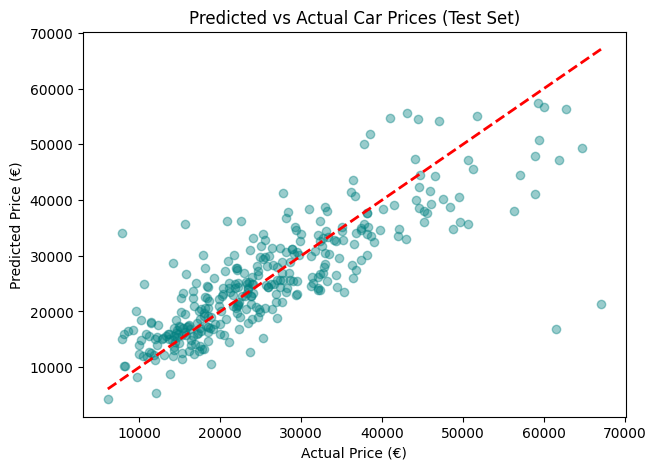

In [35]:
#Scatter plot

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_test, alpha=0.4, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price (€)")
plt.ylabel("Predicted Price (€)")
plt.title("Predicted vs Actual Car Prices (Test Set)")
plt.show()


This scatter plot compares the actual price of the car with the predicted values from the Gradient Boosting model. The red-dashed line is the perfect case where points align exactly on the line. As we can see, the majority of points are very close to the line, indicating that the model predicts the price direction accurately . However there are still minor deviations from the line when it comes to higher price range (slight over- or underestimating) and that is normal for this kind of market .

#Residuals Analysis  

In the comparison between predicted and actual car prices, we realized that, although the points were roughly all situated on the diagonal, they had progressively more spread at higher prices suggesting that there may possibly be systematic errors.

To examine this, we conducted a residual analysis to exactly measure these errors.

#

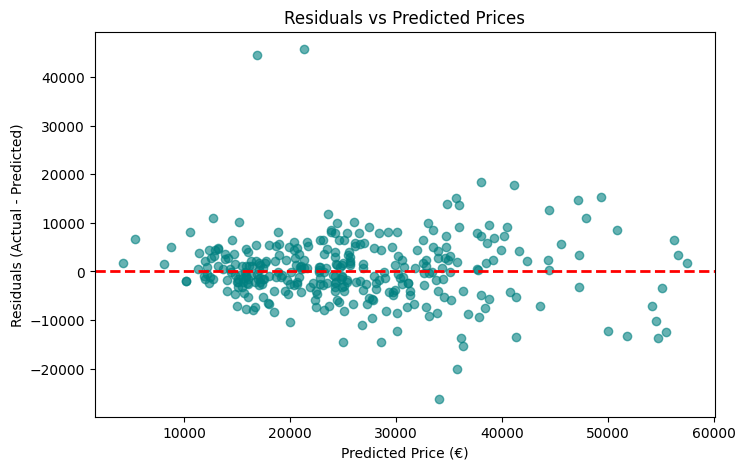

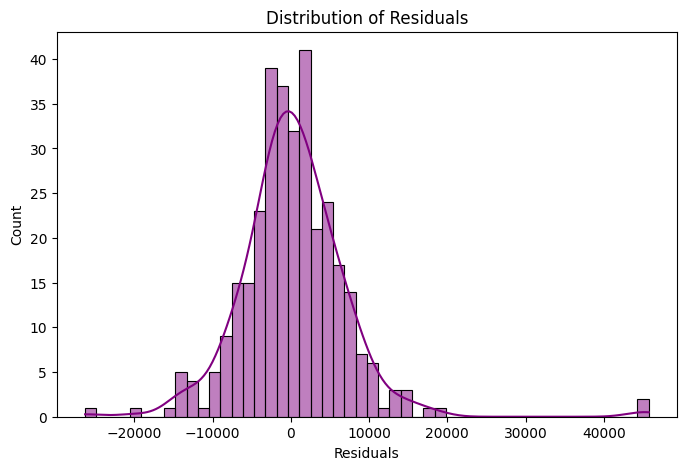

In [36]:
residuals = y_test - y_pred_test

# Residual plot
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_test, residuals, alpha=0.6, color="teal")
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.xlabel("Predicted Price (€)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted Prices")
plt.show()

# Distribution of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=50, kde=True, color="purple")
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()


The scatterplot of residuals suggest that the errors are mainly centered around zero, and the histogram also suggests the errors are more or less normally distributed.These two observations suggest that our model seems to be relatively unbiased, but it does seem like there are some larger deviations in the most extreme prices which may be due to lack of relationships in the raw dataset .

#**VI. Final Discussion :**


During the Analysis of this project , we encountered Several technical issues as we processed the data. The price column was populated with string characters at first, which created an issue when we applied transformations to the data. We were able to resolve the issue by cleaning and converting the values to numeric types. We also noticed that mileage was represented in the thousands (10 – 9380), which was an odd representation until we multiplied it by 1000 to realize the representation was accurate.

During the feature engineering process, we employed one-hot encoding to expand the categorical features into hundreds of discrete variables.This complexity was manageable, however, it allowed the tree-based models to capture important categorical aspects of the data like brand and fuel-type.


As we developed models for the task, we came up to the conclusion that :

- The Dummy Regressor confirmed that predicting mean values, was a weak approach.

- The Linear Regression model performed reasonably well but was unable to capture more complex non-linear relationships in the data.

- The Ridge Regression finished with a reasonable model performance after tuning its performance (alpha = 0.1), however, with Ridge still performed weaker than the tree-based methods.

- Lasso, however, produced convergence warnings and weak accuracy, so it was dropped.

- The Decision Tree was too simple, while the Random Forest performed stronger after tuning with RandomizedSearchCV, but never was able to beat the performance of the Gradient Boosting trees.

While tuning, we made some adjustments for practical reasons. Random Forest fundamentally broke with (max_features="auto" due to scikit-learn) , so we made it valid with (sqrt, log2, None).

Gradien Boosting with full 5-fold cross-validation over 20 iterations was simply more computationally slow, so we reduced it to 3-fold cross-validation with 10 iterations to preserve performance while balancing speed.

The residuals test suggested that while the model predicted most cars reasonably well, it struggled with expensive cars, and this is consistent with the spread we see in the Predicted vs Actual plot.


In conclusion, all of this led to a few findings:

Preprocessing is important to catch errors upfront, linear models are too simplistic for complex and non-linear relationships, and that tree-based models, and Gradient Boosting in particular, were best for predicting used car prices.

At the end, Gradient Boosting was the best model and added data-supported reliability in establishing fair and competitive pricing for used cars.

#**Refrences :**

Gonza (2021). French second hand cars. [online] Kaggle.com. Available at: https://www.kaggle.com/datasets/spicemix/french-second-hand-car/data [Accessed 24 Sep. 2025].

Scikit-learn.org. (2025). sklearn.dummy.DummyRegressor — scikit-learn 0.15-git documentation. [online] Available at: https://scikit-learn.org/0.15/modules/generated/sklearn.dummy.DummyRegressor.html [Accessed 24 Sep. 2025].

scikit-learn (2019). 1. Supervised learning — scikit-learn 0.22 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/supervised_learning.html.

